<a href="https://colab.research.google.com/github/patternproject/r.sb.gtm1/blob/main/Survey_IT2_PayAmount_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Library
library(ggplot2)
library(tidyverse)
#install.packages("readxl")
library(readxl)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.5     ✔ dplyr   1.0.3
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [5]:
# reading in input File
input_file = '/content/Without - Payment Pref - OneTime.xlsx'
df_master = read_xlsx(input_file, sheet=1)

In [6]:
# printing DF
print(as_tibble(df_master))

# A tibble: 49 x 2
   Amount Count
    <dbl> <dbl>
 1      0    51
 2      1     1
 3      2    NA
 4     14     1
 5    100     1
 6    200     1
 7    300    NA
 8    400     1
 9    500    NA
10    600     1
# … with 39 more rows


removing NA

In [8]:
df_master %>% drop_na(Count) -> df_1

In [9]:
str(df_1)

tibble [35 × 2] (S3: tbl_df/tbl/data.frame)
 $ Amount: num [1:35] 0 1 14 100 200 400 600 750 800 1000 ...
 $ Count : num [1:35] 51 1 1 1 1 1 1 1 1 12 ...


In [18]:
df_1$bin <- cut(df_1$Amount, breaks=c(-1,5000,10000,15000,20000,25000))

In [19]:
str(df_1)

tibble [35 × 3] (S3: tbl_df/tbl/data.frame)
 $ Amount: num [1:35] 0 1 14 100 200 400 600 750 800 1000 ...
 $ Count : num [1:35] 51 1 1 1 1 1 1 1 1 12 ...
 $ bin   : Factor w/ 5 levels "(-1,5e+03]","(5e+03,1e+04]",..: 1 1 1 1 1 1 1 1 1 1 ...


In [20]:
write_csv(df_1,"temp.csv")

`geom_smooth()` using formula 'y ~ x'



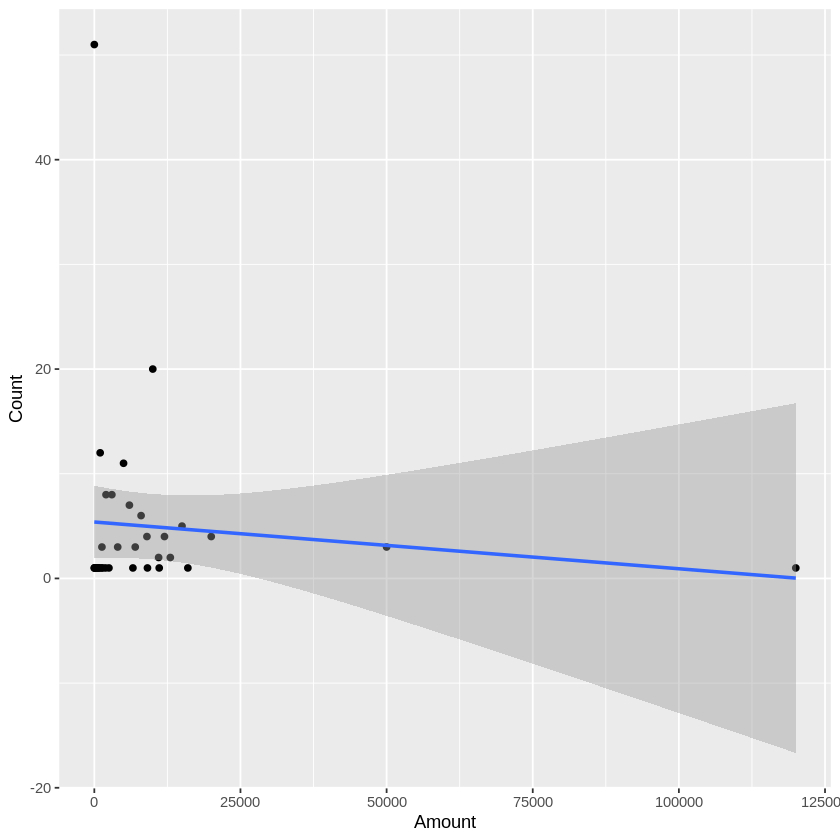

In [21]:
b <- ggplot(df_1, aes(x = Amount, y = Count))
# Scatter plot with regression line
b + geom_point()+
  geom_smooth(method = "lm") 

In [24]:
b <- ggplot(df_1, aes(x = Amount, y = Count))
# Scatter plot with regression line
g1 <- b + geom_point()

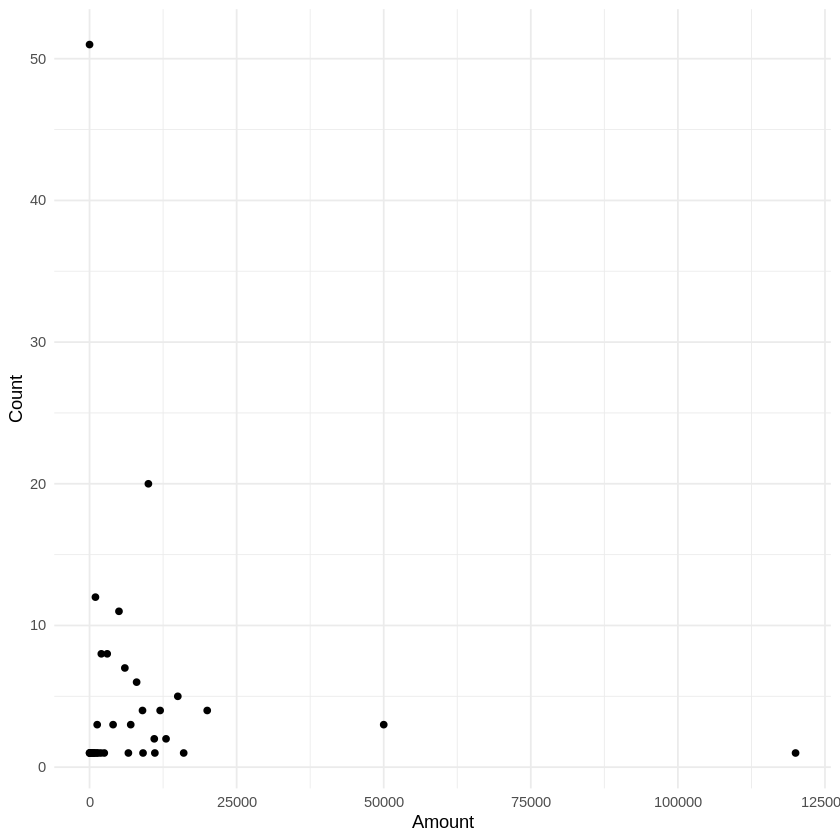

In [25]:
g1 <- g1 + theme_minimal()
g1

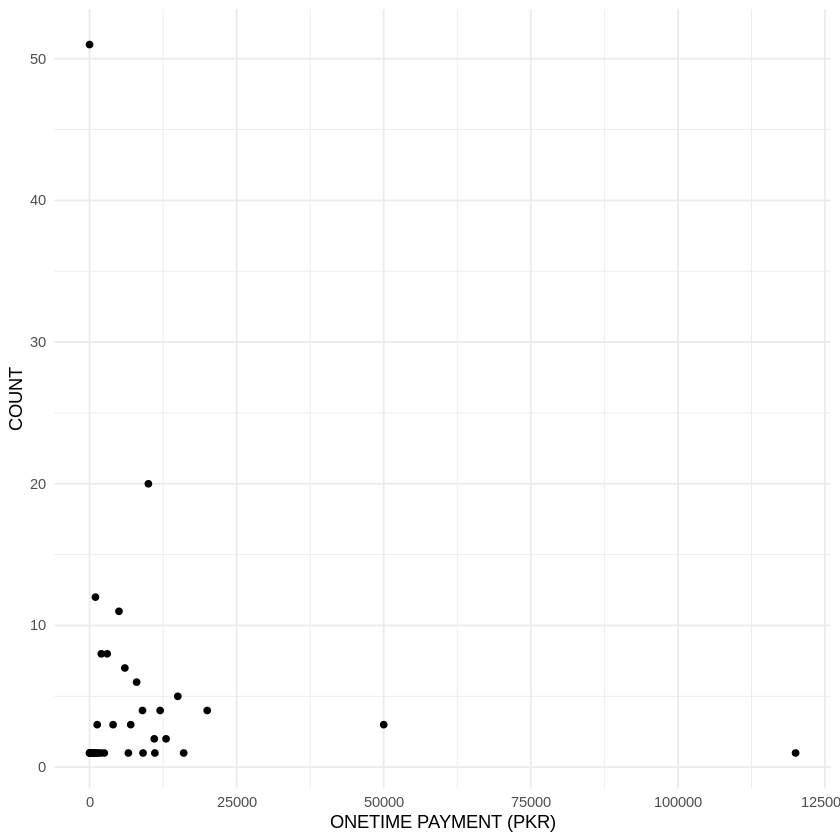

In [26]:
# bars are too little to add data labels
g1 <- g1 + labs(x = "ONETIME PAYMENT (PKR)", y = "COUNT")
g1

In [30]:
df_2 <- df_1 %>% filter(Amount<=25000) 

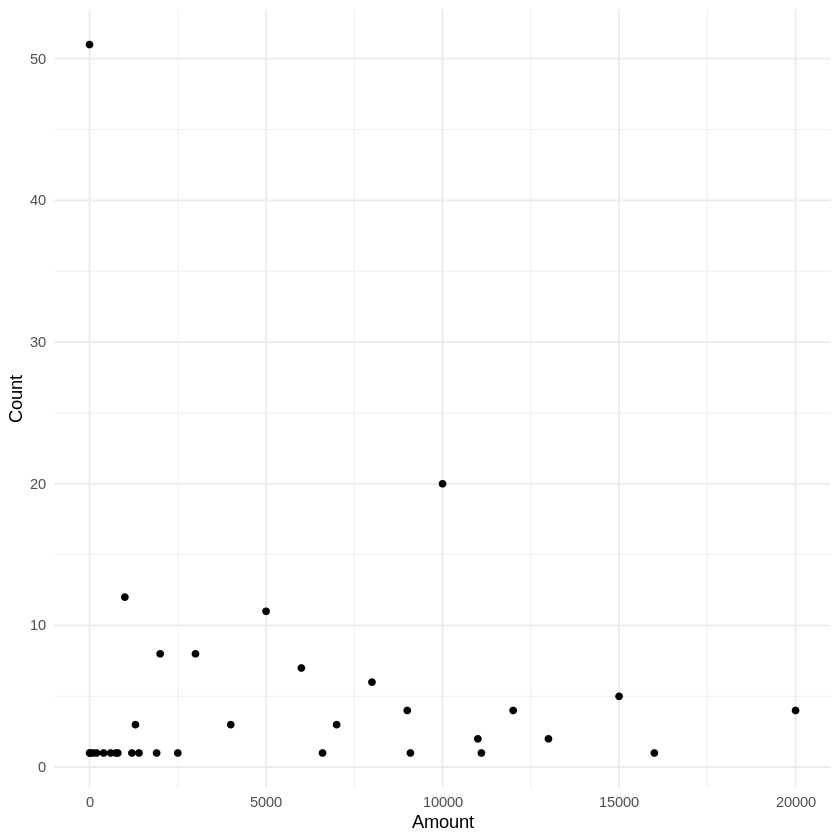

In [31]:
gSecond <- ggplot(df_2, aes(x = Amount, y = Count))
# Scatter plot with regression line
gSecond <- gSecond + geom_point()
gSecond <- gSecond + theme_minimal()
gSecond

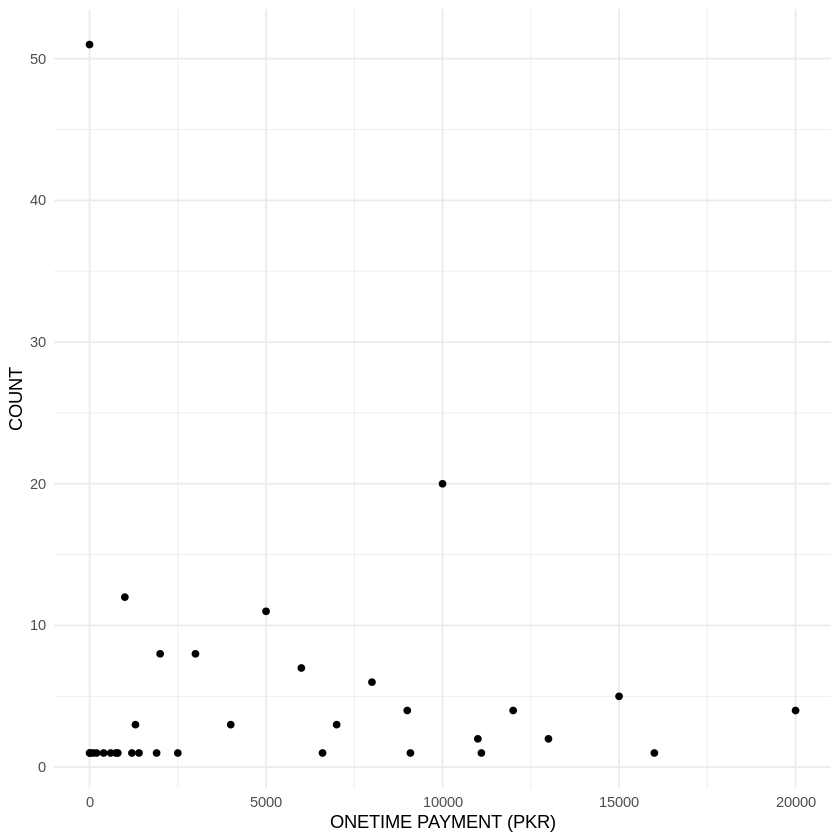

In [32]:
# bars are too little to add data labels
gSecond <- gSecond + labs(x = "ONETIME PAYMENT (PKR)", y = "COUNT")
gSecond